# ML - zadania

### 1. Zmienne zerojedynkowe i standaryzacja

In [34]:
import pandas as pd
import numpy as np
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}
df = pd.DataFrame(data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [35]:
for col in ['size', 'color', 'gender', 'bought']:
    df[col] = df[col].astype('category')
df['weight'] = df['weight'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 740.0 bytes


In [36]:
df.describe(include=['category']).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [38]:
df = pd.get_dummies(df, drop_first = True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [42]:
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
df['weight'] = (df['weight'] - df['weight'].mean()) / df['weight'].std()
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.650274,1.221789,1,0,1,0,1,0
1,-0.618853,0.557773,0,0,0,1,0,1
2,-0.412568,-1.434274,1,1,0,0,0,1
3,0.206284,-0.371849,0,0,0,1,0,0
4,-0.825137,0.026561,1,1,0,0,1,0


### 2. Braki danych

In [44]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}
df = pd.DataFrame(data=data)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [45]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df ['weight'] = imputer.fit_transform(df[['weight']])
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 99.9)
df ['price'] = imputer.fit_transform(df[['price']])
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 'L')
df ['size'] = imputer.fit_transform(df[['size']])
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df ['size'] = imputer.fit_transform(df[['size']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,0.0,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


### 3. Ekstrakcja cech

In [73]:
df = pd.DataFrame(data={'height': [175., 178.5, 185., 191., 184.5, 183., 168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [74]:
df['height_cat'] = pd.cut(x=df.height, bins=3)
df

,height,height_cat
0,175.0,"(167.977, 175.667]"
1,178.5,"(175.667, 183.333]"
2,185.0,"(183.333, 191.0]"
3,191.0,"(183.333, 191.0]"
4,184.5,"(183.333, 191.0]"
5,183.0,"(175.667, 183.333]"
6,168.0,"(167.977, 175.667]"


In [75]:
df['height_cat'] = pd.cut(x=df.height, bins=(160, 175, 180, 195), labels=['small', 'medium', 'high'])
df

,height,height_cat
0,175.0,small
1,178.5,medium
2,185.0,high
3,191.0,high
4,184.5,high
5,183.0,high
6,168.0,small


In [76]:
pd.get_dummies(df, drop_first=True, prefix='height')

,height,height_medium,height_high
0,175.0,0,0
1,178.5,1,0
2,185.0,0,1
3,191.0,0,1
4,184.5,0,1
5,183.0,0,1
6,168.0,0,0


In [78]:
df = pd.DataFrame(data={'lang': [['PL', 'ENG'], ['GER', 'ENG', 'PL', 'FRA'], ['RUS']]})
df['ilosc']=df['lang'].map(lambda x: len(x))
df

,lang,ilosc
0,"[PL, ENG]",2
1,"[GER, ENG, PL, FRA]",4
2,[RUS],1


In [79]:
df = pd.DataFrame(data={'website': ['wp.pl', 'onet.pl', 'google.com']})
df ['domena']=df['website'].map(lambda x: x.split('.')[1])
df

,website,domena
0,wp.pl,pl
1,onet.pl,pl
2,google.com,com


### 4. Zbiór treningowy i testowy

In [112]:
import seaborn as sns 
# seaborn - do grafiki
import numpy as np
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data_copy = raw_data.copy()
np.random.seed(42)
sns.set()

In [113]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0]


In [134]:
df = pd.DataFrame(data, columns = raw_data.feature_names)
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [135]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

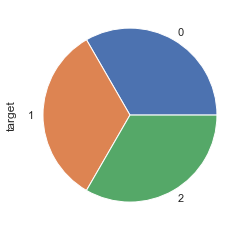

In [136]:
df['target'].value_counts().plot(kind='pie')

In [137]:
data = df.copy()
target = df.pop('target')

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, train_size = 0.9)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify = target)

In [142]:
y_train.value_counts()

2    47
1    44
0    44
Name: target, dtype: int64

### 5. Regresja liniowa

In [1]:
import numpy as np
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))

In [2]:
from sklearn.datasets import make_regression
data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression()

In [4]:
regressor.score(data, target)

0.7426670084336404

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [152]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [153]:
regressor.score(X_train, y_train)

0.7590790923192859

In [154]:
regressor.score(X_test, y_test)

0.5943773713869359

In [156]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-35.967345,-67.054386
1,143.721588,72.086457
2,65.396144,39.093851
3,15.000109,-20.638510
4,-3.325655,-12.806245


In [159]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']

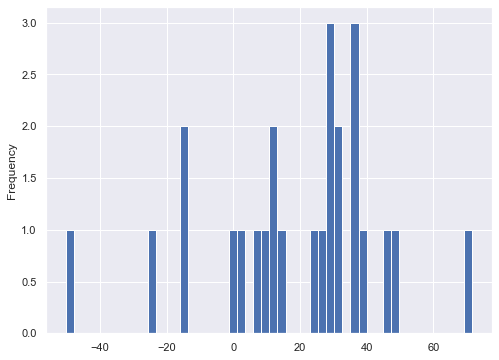

In [162]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8, 6))

In [187]:
import statsmodels.api as sm
baza = pd.DataFrame({'A': [1,2,3, 6, 7], 'B': [ 4,6, 15, 20, 22], 'C':[0,0,2,3,4], 'const': [1,1,1,1,1]})
baza
data = baza.copy()
target = data.pop('A')
ols = sm.OLS(endog = target, exog = data).fit()
predictors = list(data)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     12.47
Date:                Tue, 05 Jul 2022   Prob (F-statistic):             0.0742
Time:                        18:00:38   Log-Likelihood:                -4.7905
No. Observations:                   5   AIC:                             15.58
Df Residuals:                       2   BIC:                             14.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B              0.0997      0.414      0.241      0.8

C:\Users\kubeq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### 6. Drzewa regresyjne

In [6]:
data, target = make_regression(n_samples=200, n_features=5, noise=20)
target = target ** 2

In [7]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth = 1)
regressor.fit(data, target)

DecisionTreeRegressor(max_depth=1)

In [8]:
regressor.score(data, target)

0.12877382670391158

### 7. Regresja logistyczna

In [1]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0])

### 8. Drzewa decyzyjne lasy losowe

### Wady drzew decyzyjnych:

1. Niestabilność
2. Złożoność
3. Skłonnosć do szybkiego przeuczenia

In [93]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 1000)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(f'{acc:.4f}')

0.9320


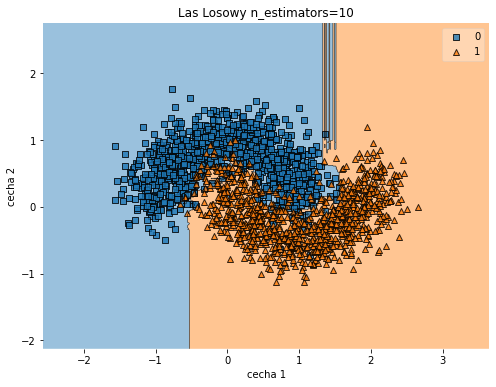

In [94]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, model)
plt.xlabel('cecha 1')
plt.ylabel('cecha 2')
plt.title('Las Losowy n_estimators=1000')
plt.show()

### 9. Przeszukiwanie siatki

In [ ]:
# metoda gridsearch

### Zadanie 1. Na podstawie słownika utwórz obiekt typu DataFrame. Sprawdź liczbę braków danych dla każdej z kolumn. Podaj procent braków. Wynik zaokrąglij do drugiego miejsca po przecinku. 

In [8]:
import pandas as pd
import numpy as np
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
} 
df = pd.DataFrame(data)
print(round(df.isnull().sum() /len(df),2))

size      0.17
color     0.00
gender    0.17
price     0.17
weight    0.33
bought    0.00
dtype: float64


### Zadanie 2. Braki danych zastąp średnią.

In [52]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['weight']=imputer.fit_transform(df[['weight']])

### Zadanie 3. Wyświetl średnią, która zostaje wstawiona w ramah działania metody SimpleImputer.

In [61]:
imputer.statistics_[0]

415.0

### Zadanie 4. Braki danych zastąp stałą.

In [64]:
imputer = SimpleImputer(missing_values =np.nan, strategy = 'constant', fill_value = 99.0)
df['price']= imputer.fit_transform(df[['price']])
print(df)

  size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN    0.0   300.0    yes
3    L  green  female  129.0   415.0     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0   415.0     no


### Zadanie 5. Braki danych zastąp najczęstszą wartością.

In [68]:
imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
df['sieze']=imputer.fit_transform(df[['size']])
print(df)

  size  color  gender  price  weight bought sieze
0   XL    red  female  199.0   500.0    yes    XL
1    L  green    male   89.0   450.0     no     L
2    M   blue     NaN    0.0   300.0    yes     M
3    L  green  female  129.0   415.0     no     L
4    M    red  female   79.0   410.0    yes     M
5    M  green    male   89.0   415.0     no     M


### Zadanie 6. Policz średnie dla wierszy bez braków danych.

In [69]:
print(df[~df['weight'].isnull()].mean())

price      97.5
weight    415.0
dtype: float64


C:\Users\kubeq\AppData\Local\Temp\ipykernel_8320\1694396691.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[~df['weight'].isnull()].mean())


### Zadanie 7. Wypełnij braki danych słowem 'empty'.

In [ ]:
df_object = df.select_dtypes(include=['object']).fillna('empty')
print(df_object

### Zadanie 8. Dokonaj dyskretyzacji zmiennej ciągłej na 3 klasy.

In [81]:
df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df['weight_cut']  = pd.cut(df['weight'],bins=3) 
print(df)

   weight        weight_cut
0    75.0  (67.977, 75.667]
1    78.5  (75.667, 83.333]
2    85.0    (83.333, 91.0]
3    91.0    (83.333, 91.0]
4    84.5    (83.333, 91.0]
5    83.0  (75.667, 83.333]
6    68.0  (67.977, 75.667]


### Zadanie 9. Dokonaj dyskretyzacji zmiennej ciągłej na zadane z góry klasy.

In [82]:
df['weight_cut'] = pd.cut(df['weight'], bins = [60,75,80,95])
print(df)

   weight weight_cut
0    75.0   (60, 75]
1    78.5   (75, 80]
2    85.0   (80, 95]
3    91.0   (80, 95]
4    84.5   (80, 95]
5    83.0   (80, 95]
6    68.0   (60, 75]


### Zadanie 10. Dokonaj dyskretyzacji zmiennej ciągłej na zadane z góry klasy. Nadaj klasom nazwy.

In [83]:
df['weight_cut'] = pd.cut(df['weight'], bins = [60,75,80,95], labels = ['light','normal','heavy'])
print(df)

   weight weight_cut
0    75.0      light
1    78.5     normal
2    85.0      heavy
3    91.0      heavy
4    84.5      heavy
5    83.0      heavy
6    68.0      light


### Zadanie 11. Utwórz zmienne zerojedynkowe.

In [84]:
df=pd.get_dummies(df)
print(df)

   weight  weight_cut_light  weight_cut_normal  weight_cut_heavy
0    75.0                 1                  0                 0
1    78.5                 0                  1                 0
2    85.0                 0                  0                 1
3    91.0                 0                  0                 1
4    84.5                 0                  0                 1
5    83.0                 0                  0                 1
6    68.0                 1                  0                 0


### Zadanie 12. Utwórz zmienną wskazującą na długość listy.

In [86]:
data_dict = {
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
}
df = pd.DataFrame(data=data_dict)
df['number']=df['currency'].map(lambda x: len(x))
print(df)

               currency  number
0            [PLN, USD]       2
1  [EUR, USD, PLN, CAD]       4
2                 [GBP]       1
3       [JPY, CZK, HUF]       3
4                    []       0


### Zadanie 13. Utwórz zmienną wskazującą na to czy dany obiekt jest na liście.

In [90]:
df['PLN_flag'] = df['currency'].map(lambda x: 1 if 'PLN' in x else 0)
print(df)

               currency  number  PLN_flag
0            [PLN, USD]       2         1
1  [EUR, USD, PLN, CAD]       4         1
2                 [GBP]       1         0
3       [JPY, CZK, HUF]       3         0
4                    []       0         0


### Zadanie 14. Przygotuj nowe zmienne na podstawie zdania.

In [93]:
df = pd.DataFrame(data={'hashtags': ['#good#vibes', '#hot#summer#holiday', '#street#food', '#workout']})
df = df['hashtags'].str.split('#', expand=True)
df = df.drop(columns=[0])
df.columns = ['hashtag1', 'hashtag2', 'hashtag3']
df

,hashtag1,hashtag2,hashtag3
0,good,vibes,None
1,hot,summer,holiday
2,street,food,None
3,workout,None,None


### Zadanie 15. Znajdź liczbę braków każdym wierszu.

In [94]:
df['missing'] = df.isnull().sum(axis=1)
print(df)

  hashtag1 hashtag2 hashtag3  missing
0     good    vibes     None        1
1      hot   summer  holiday        0
2   street     food     None        1
3  workout     None     None        2


### Zadanie 16. Zmień typ wybranej zmiennej.

In [96]:
df = pd.DataFrame(data={'investments': ['100_000_000', '100_000', '30_000_000', '100_500_000']})
df['investments'] = df['investments'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   investments  4 non-null      int32
dtypes: int32(1)
memory usage: 144.0 bytes


### Zadanie 17. Wczytaj zbiór danych irys i wyświetl klucze wczytanego słownika.

In [99]:
from sklearn.datasets import load_iris
df = load_iris()
print(data.keys())

dict_keys(['size', 'color', 'gender', 'price', 'weight', 'bought'])


### Zadanie 18. Wyświetl informacje o zbiorze.

In [101]:
data = load_iris()
print(data['feature_names'])
print(data['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Zadanie 19. Przygotuj zmienne data i target.

In [167]:
data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']

### Zadanie 20. Podziel zbiór na treningowy i testowy.

In [168]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3)
print(f'data_train shape: {data_train.shape}')
print(f'target_train shape: {target_train.shape}')
print(f'data_test shape: {data_test.shape}')
print(f'target_test shape: {target_test.shape}')

data_train shape: (105, 4)
target_train shape: (105,)
data_test shape: (45, 4)
target_test shape: (45,)


### Zadanie 21. Zbuduj model regresji logistycznej.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data_raw = load_iris()
data = data_raw['data']
target = data_raw['target']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=20)
model = LogisticRegression(max_iter=1000)
model.fit(data_train,target_train)
accuracy = model.score(data_test, target_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9333


### Zadanie 22. Dokonaj predykcji w modelu regresji logistycznej.

In [15]:
target_pred = model.predict(data_test)
print(target_pred)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1 1 1 0 0 0 1 1
 0 1 2 1 2 0 1 1]


### Zadanie 23. Znajdź macierz pomyłek.

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(target_test, target_pred)

print(conf_matrix)

[[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]


### Zadanie 24. Wyświetl raport z klasyfikacji modelu.

In [22]:
from sklearn.metrics import classification_report

print(classification_report(target_test, targer_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        18
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### Zadanie 25. Dokonaj kodowania zmiennej.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data=data)
for col in ['size', 'color', 'gender', 'bought']:
    df[col] = df[col].astype('category')
df['weight'] = df['weight'].astype('float')

df['bought'] = df['bought'].map(lambda x: 1 if x=="yes" else 0)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


### Zadanie 28. Wczytaj odpowiednie dane i utwórz tabele 'data' i 'target'.

In [26]:
import numpy as np
from sklearn.datasets import load_breast_cancer


np.set_printoptions(precision=2, suppress=True, linewidth=100)
raw_data = load_breast_cancer()

data = raw_data['data']
target = raw_data['target']
print(data[:3])

[[  17.99   10.38  122.8  1001.      0.12    0.28    0.3     0.15    0.24    0.08    1.09    0.91
     8.59  153.4     0.01    0.05    0.05    0.02    0.03    0.01   25.38   17.33  184.6  2019.
     0.16    0.67    0.71    0.27    0.46    0.12]
 [  20.57   17.77  132.9  1326.      0.08    0.08    0.09    0.07    0.18    0.06    0.54    0.73
     3.4    74.08    0.01    0.01    0.02    0.01    0.01    0.     24.99   23.41  158.8  1956.
     0.12    0.19    0.24    0.19    0.28    0.09]
 [  19.69   21.25  130.   1203.      0.11    0.16    0.2     0.13    0.21    0.06    0.75    0.79
     4.58   94.03    0.01    0.04    0.04    0.02    0.02    0.     23.57   25.53  152.5  1709.
     0.14    0.42    0.45    0.24    0.36    0.09]]


### Zadanie 29. Połącz 2 tabele.

In [36]:
all_data = pd.DataFrame(data,  columns=list(raw_data['feature_names']))
all_data['target'] = target
print(all_data[:3])

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \


### Zadanie 31. Podziel zbiór na testowy i walidacyjny.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25)
 
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)


### Zadanie 32. Sprawdź liczebności klas

In [56]:
print(np.unique(target, return_counts=True)[1]/len(target))

[0.37 0.63]


In [57]:
print(np.unique(y_test, return_counts=True)[1]/len(y_test))

[0.31 0.69]


In [58]:
print(np.unique(y_train, return_counts=True)[1]/len(y_train))

[0.39 0.61]


### Zadanie 33. Podziel zbiór na testowy i walidacyjny.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25, stratify=target)


In [61]:
print(np.unique(y_test, return_counts=True)[1]/len(y_test))

[0.37 0.63]


### Zadanie 47. Zbuduj drzewo klasyfikacyjne.

In [72]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(f'{acc:.4f}')

0.9020


### Zadanie 48. Zbuduj drzewo klasyfikacyjne podając maksymalną głębokość drzewa.

In [73]:
model=DecisionTreeClassifier(max_depth = 6)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(f'{acc:.4f}')

0.9280


### Zadanie 49. Zbuduj drzewo klasyfikacyjne podając maksymalną głębokość drzewa i minimalną liczebność liści.

In [74]:
model=DecisionTreeClassifier(max_depth = 6, min_samples_leaf =6)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(f'{acc:.4f}')

0.9300


### Zadanie 50. Znajdź optymalne parametry drzewa.

In [76]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}
grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 6}


### Zadanie 51. Zbuduj las losowy.

In [99]:
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)
acc = classifier.score(X_test, y_test)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.9300


### Zadanie 52. Znajdź optymalne parametry lasu losowego.

In [104]:
np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]
 
X_train, X_test, y_train, y_test = train_test_split(data, target)
 
classifier = RandomForestClassifier(random_state=42)

In [106]:
params = {'criterion': ['gini','entropy'],
          'max_depth': [6,7,8],
          'min_samples_leaf': [4,5]}
grid_search = GridSearchCV(classifier, params, scoring = 'accuracy', cv=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}
